In [70]:
#importing libraries required for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the data
oxford_Data=pd.read_csv('LaqnData_OxfordRd_d.csv')
oxford_Data.head(10) #display first 10 records

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,WM6,NO,01/01/2018 00:00,55.9,ug m-3,R
1,WM6,NO,01/01/2018 00:15,56.4,ug m-3,R
2,WM6,NO,01/01/2018 00:30,55.5,ug m-3,R
3,WM6,NO,01/01/2018 00:45,69.1,ug m-3,R
4,WM6,NO,01/01/2018 01:00,34.7,ug m-3,R
5,WM6,NO,01/01/2018 01:15,41.8,ug m-3,R
6,WM6,NO,01/01/2018 01:30,41.8,ug m-3,R
7,WM6,NO,01/01/2018 01:45,95.1,ug m-3,R
8,WM6,NO,01/01/2018 02:00,93.6,ug m-3,R
9,WM6,NO,01/01/2018 02:15,45.5,ug m-3,R


In [71]:
oxford_Data.shape #gives the dimension of the data

(140160, 6)

In [72]:
oxford_Data.info() #to get the infomation about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140160 entries, 0 to 140159
Data columns (total 6 columns):
Site                       140160 non-null object
Species                    140160 non-null object
ReadingDateTime            140160 non-null object
Value                      101218 non-null float64
Units                      140160 non-null object
Provisional or Ratified    140160 non-null object
dtypes: float64(1), object(5)
memory usage: 6.4+ MB


In [73]:
oxford_Data.isnull().sum() #This  gives the total number of null values for each column 

Site                           0
Species                        0
ReadingDateTime                0
Value                      38942
Units                          0
Provisional or Ratified        0
dtype: int64

In [74]:
#Printing the data which has null values
oxford_Data[oxford_Data.isnull().any(1)].head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
1094,WM6,NO,12/01/2018 09:30,NaN,ug m-3,R
1095,WM6,NO,12/01/2018 09:45,NaN,ug m-3,R
1096,WM6,NO,12/01/2018 10:00,NaN,ug m-3,R
1097,WM6,NO,12/01/2018 10:15,NaN,ug m-3,R
2369,WM6,NO,25/01/2018 16:15,NaN,ug m-3,R


In [145]:
#you can see there are ug m-3 as NO2 has three different values but all three are same.These must be replaced 
print(oxford_Data['Units'].value_counts())

ug/m3           105120
ug/m3 as NO2     35012
ug/m3 as NO         28
Name: Units, dtype: int64


In [76]:
#Replacing ug m-3 as NO 2, ug m -3 as NO 2 as ug m-3 as NO2 to standard notation
oxford_Data=oxford_Data.replace(to_replace=['ug m-3 as NO 2','ug m -3 as NO 2'],value='ug/m3 as NO')
oxford_Data=oxford_Data.replace(to_replace=['ug m-3'],value='ug/m3')
oxford_Data=oxford_Data.replace(to_replace=['ug m-3 as NO2'],value='ug/m3 as NO2')

In [77]:
print(oxford_Data['Units'].value_counts()) #checking for unique values

ug/m3           105120
ug/m3 as NO2     35012
ug/m3 as NO         28
Name: Units, dtype: int64


In [ ]:
putney_data['Species'].value_counts()

In [78]:
 oxford_Data_new = oxford_Data.dropna() #dropping null values because mean and median imputation can be effected by outliers

In [79]:
oxford_Data_new.isnull().sum() #checking for null values 

Site                       0
Species                    0
ReadingDateTime            0
Value                      0
Units                      0
Provisional or Ratified    0
dtype: int64

In [80]:
#Changing the data to timeseries to make analysis based on working hours 
oxford_Data_new['ReadingDateTime'] = pd.to_datetime(oxford_Data['ReadingDateTime'], format='%d/%m/%Y %H:%M')
oxford_Data_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,WM6,NO,2018-01-01 00:00:00,55.9,ug/m3,R
1,WM6,NO,2018-01-01 00:15:00,56.4,ug/m3,R
2,WM6,NO,2018-01-01 00:30:00,55.5,ug/m3,R
3,WM6,NO,2018-01-01 00:45:00,69.1,ug/m3,R
4,WM6,NO,2018-01-01 01:00:00,34.7,ug/m3,R


In [81]:
#making ReadingDateTime as index for better indexing of time
oxford_Data_timeSeries = oxford_Data_new.set_index('ReadingDateTime')

In [82]:
#Indexing time based on non working hours
oxford_Data_non_working_hours1 = oxford_Data_timeSeries.between_time("00:00", "08:45")

In [83]:
#Prints top 5 rows
oxford_Data_non_working_hours1.head()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-01-01 00:00:00,WM6,NO,55.9,ug/m3,R
2018-01-01 00:15:00,WM6,NO,56.4,ug/m3,R
2018-01-01 00:30:00,WM6,NO,55.5,ug/m3,R
2018-01-01 00:45:00,WM6,NO,69.1,ug/m3,R
2018-01-01 01:00:00,WM6,NO,34.7,ug/m3,R


In [84]:
#Displays last 5 rows
oxford_Data_non_working_hours1.tail()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-12-31 07:45:00,WM6,PM10,13.4,ug/m3,P
2018-12-31 08:00:00,WM6,PM10,9.7,ug/m3,P
2018-12-31 08:15:00,WM6,PM10,9.7,ug/m3,P
2018-12-31 08:30:00,WM6,PM10,9.7,ug/m3,P
2018-12-31 08:45:00,WM6,PM10,9.7,ug/m3,P


In [85]:
oxford_Data_non_working_hours2 = oxford_Data_timeSeries.between_time('17:10', '23:45')

In [86]:
#Displays top 5 rows
oxford_Data_non_working_hours2.head()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-01-01 17:15:00,WM6,NO,230.60001,ug/m3,R
2018-01-01 17:30:00,WM6,NO,236.89999,ug/m3,R
2018-01-01 17:45:00,WM6,NO,238.20000,ug/m3,R
2018-01-01 18:00:00,WM6,NO,206.39999,ug/m3,R
2018-01-01 18:15:00,WM6,NO,185.10001,ug/m3,R


In [87]:
#Displays bottom 5 rows
oxford_Data_non_working_hours2.tail()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-12-31 22:45:00,WM6,PM10,23.9,ug/m3,P
2018-12-31 23:00:00,WM6,PM10,22.3,ug/m3,P
2018-12-31 23:15:00,WM6,PM10,22.3,ug/m3,P
2018-12-31 23:30:00,WM6,PM10,22.3,ug/m3,P
2018-12-31 23:45:00,WM6,PM10,22.3,ug/m3,P


In [88]:
#Concatinating both the dataframe which contains only non working hours
oxford_data_final = pd.concat([oxford_Data_non_working_hours1, oxford_Data_non_working_hours2])

In [89]:
oxford_data_final.head(10)

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-01-01 00:00:00,WM6,NO,55.9,ug/m3,R
2018-01-01 00:15:00,WM6,NO,56.4,ug/m3,R
2018-01-01 00:30:00,WM6,NO,55.5,ug/m3,R
2018-01-01 00:45:00,WM6,NO,69.1,ug/m3,R
2018-01-01 01:00:00,WM6,NO,34.7,ug/m3,R
2018-01-01 01:15:00,WM6,NO,41.8,ug/m3,R
2018-01-01 01:30:00,WM6,NO,41.8,ug/m3,R
2018-01-01 01:45:00,WM6,NO,95.1,ug/m3,R
2018-01-01 02:00:00,WM6,NO,93.6,ug/m3,R


In [90]:
#This gives statistical description for values column
oxford_data_final.describe()

,Value
count,66936.000000
mean,84.148249
std,87.401271
min,-1.800000
25%,28.300000
50%,55.600000
75%,104.300000
max,1415.400020


if you observe the above values for oxford city, the mean value for whole month is around 84 which is quite large.Here i considered the effect of all gases irrespective of harmfulness of each gas(requires proper domain knowledge).The 75% of the data has value more than 104 AQI which is quite large. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


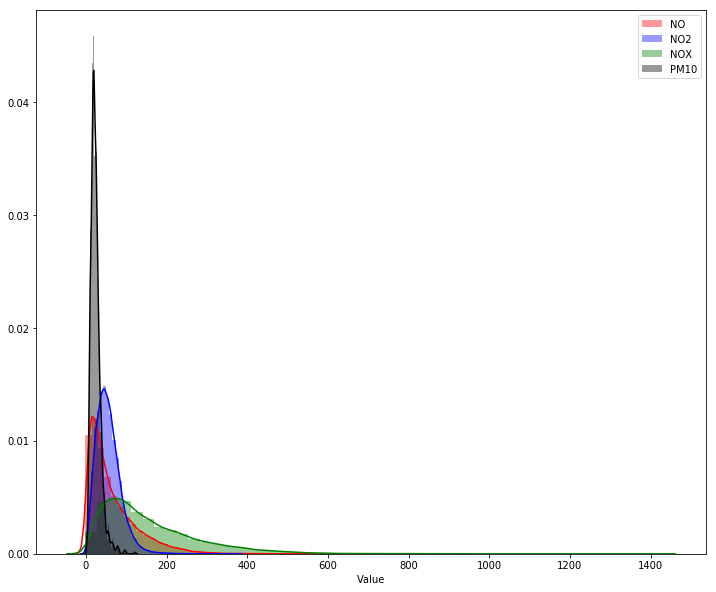

In [91]:
#Distribute plot of each gas. The gas pM10 looks to be more dominant 

plt.figure(figsize=(12,10))
#plt.subplot(1,2,2)
sns.distplot(oxford_data_final[oxford_data_final['Species'] == 'NO']['Value'][0:] , label = "NO" , color = 'red')
sns.distplot(oxford_data_final[oxford_data_final['Species'] == 'NO2']['Value'][0:] , label = "NO2" , color = 'blue')
sns.distplot(oxford_data_final[oxford_data_final['Species'] == 'NOX']['Value'] [0:], label = "NOX" , color = 'green')
sns.distplot(oxford_data_final[oxford_data_final['Species'] == 'PM10']['Value'][0:] , label = "PM10" , color = 'black')
plt.legend()

plt.show()

If you observe the above graph the values are distributed till 400 quite more and highest with 1400

In [122]:
putney_data=pd.read_csv('LaqnData_Putney_d.csv')
print(putney_data.head(10))
print(putney_data.shape)

  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  WA9      CO  01/01/2018 00:00    NaN  mg m-3                       P
1  WA9      CO  01/01/2018 00:15    NaN  mg m-3                       P
2  WA9      CO  01/01/2018 00:30    NaN  mg m-3                       P
3  WA9      CO  01/01/2018 00:45    NaN  mg m-3                       P
4  WA9      CO  01/01/2018 01:00    NaN  mg m-3                       P
5  WA9      CO  01/01/2018 01:15    NaN  mg m-3                       P
6  WA9      CO  01/01/2018 01:30    NaN  mg m-3                       P
7  WA9      CO  01/01/2018 01:45    NaN  mg m-3                       P
8  WA9      CO  01/01/2018 02:00    NaN  mg m-3                       P
9  WA9      CO  01/01/2018 02:15    NaN  mg m-3                       P
(175200, 6)


In [123]:
putney_data.info() #to get the infomation about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 6 columns):
Site                       175200 non-null object
Species                    175200 non-null object
ReadingDateTime            175200 non-null object
Value                      124197 non-null float64
Units                      175200 non-null object
Provisional or Ratified    175200 non-null object
dtypes: float64(1), object(5)
memory usage: 8.0+ MB


In [124]:
putney_data.isnull().sum() #This  gives the total number of null values for each column 

Site                           0
Species                        0
ReadingDateTime                0
Value                      51003
Units                          0
Provisional or Ratified        0
dtype: int64

In [125]:
#Printing the data which has null values
putney_data[putney_data.isnull().any(1)].head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,WA9,CO,01/01/2018 00:00,NaN,mg m-3,P
1,WA9,CO,01/01/2018 00:15,NaN,mg m-3,P
2,WA9,CO,01/01/2018 00:30,NaN,mg m-3,P
3,WA9,CO,01/01/2018 00:45,NaN,mg m-3,P
4,WA9,CO,01/01/2018 01:00,NaN,mg m-3,P


In [126]:
#you can see there are ug m-3 as NO2 has three different values but all three are same.These must be replaced 
print(putney_data['Units'].value_counts())

ug m-3                           70080
ug m-3 as NO2                    35040
ug m-3 reference equiv by VCM    35040
mg m-3                           35037
mg m- 3                              1
mg m-3                               1
mg  m-3                              1
Name: Units, dtype: int64


In [127]:
#Replacing ug m-3 as NO 2, ug m -3 as NO 2 as ug m-3 as NO2 to standard notation
putney_data=putney_data.replace(to_replace=['ug m-3 as NO2'],value='ug/m3 as NO2')
putney_data=putney_data.replace(to_replace=['ug m-3'],value='ug/m3')
putney_data=putney_data.replace(to_replace=['ug m-3 reference equiv by VCM'],value='ug m/3 reference equiv by VCM')
putney_data=putney_data.replace(to_replace=['mg m- 3'],value='mg/m3')
putney_data=putney_data.replace(to_replace=['mg m-3'],value='mg/m3')
putney_data=putney_data.replace(to_replace=['mg  m-3'],value='mg/m3')
putney_data=putney_data.replace(to_replace=['mg  m-3'],value='mg/m3')


In [128]:
print(putney_data['Units'].value_counts()) #checking for unique values

ug/m3                            70080
ug m/3 reference equiv by VCM    35040
ug/m3 as NO2                     35040
mg/m3                            35039
mg m-3                               1
Name: Units, dtype: int64


In [146]:
putney_data['Species'].value_counts()

NOX     35040
PM10    35040
NO2     35040
CO      35038
NO      35014
no         26
co          1
Co          1
Name: Species, dtype: int64

In [147]:
putney_data=putney_data.replace(to_replace='no',value='NO')
putney_data=putney_data.replace(to_replace=['co','Co'],value='CO')

In [129]:
putney_data_new = putney_data.dropna() #dropping null values because mean and median imputation can be effected by outliers

In [130]:
putney_data_new.isnull().sum() #checking for null values 

Site                       0
Species                    0
ReadingDateTime            0
Value                      0
Units                      0
Provisional or Ratified    0
dtype: int64

In [131]:
#Changing the data to timeseries to make analysis based on working hours 
putney_data_new['ReadingDateTime'] = pd.to_datetime(putney_data_new['ReadingDateTime'], format='%d/%m/%Y %H:%M')
putney_data_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
38762,WA9,NO,2018-02-08 18:30:00,15.4,ug/m3,P
38763,WA9,NO,2018-02-08 18:45:00,14.1,ug/m3,P
38764,WA9,NO,2018-02-08 19:00:00,12.8,ug/m3,P
38765,WA9,NO,2018-02-08 19:15:00,10.2,ug/m3,P
38766,WA9,NO,2018-02-08 19:30:00,10.2,ug/m3,P


In [132]:
#making ReadingDateTime as index for better indexing of time
putney_data_timeSeries = putney_data_new.set_index('ReadingDateTime')

In [133]:
#Indexing time based on non working hours
putney_data_non_working_hours1 = putney_data_timeSeries.between_time("00:00", "08:45")

In [134]:
#Prints top 5 rows
putney_data_non_working_hours1.head()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-02-09 00:00:00,WA9,NO,5.1,ug/m3,P
2018-02-09 00:15:00,WA9,NO,3.8,ug/m3,P
2018-02-09 00:30:00,WA9,NO,2.6,ug/m3,P
2018-02-09 00:45:00,WA9,NO,2.6,ug/m3,P
2018-02-09 01:00:00,WA9,NO,2.6,ug/m3,P


In [135]:
#Displays last 5 rows
putney_data_non_working_hours1.tail()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-12-31 07:45:00,WA9,PM10,4.0,ug m/3 reference equiv by VCM,P
2018-12-31 08:00:00,WA9,PM10,8.0,ug m/3 reference equiv by VCM,P
2018-12-31 08:15:00,WA9,PM10,6.0,ug m/3 reference equiv by VCM,P
2018-12-31 08:30:00,WA9,PM10,5.0,ug m/3 reference equiv by VCM,P
2018-12-31 08:45:00,WA9,PM10,6.0,ug m/3 reference equiv by VCM,P


In [136]:
putney_data_non_working_hours2 = putney_data_timeSeries.between_time('17:10', '23:45')

In [137]:
#Displays top 5 rows
putney_data_non_working_hours2.head()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-02-08 18:30:00,WA9,NO,15.4,ug/m3,P
2018-02-08 18:45:00,WA9,NO,14.1,ug/m3,P
2018-02-08 19:00:00,WA9,NO,12.8,ug/m3,P
2018-02-08 19:15:00,WA9,NO,10.2,ug/m3,P
2018-02-08 19:30:00,WA9,NO,10.2,ug/m3,P


In [138]:
#Displays bottom 5 rows
putney_data_non_working_hours2.tail()

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-12-31 22:45:00,WA9,PM10,13.0,ug m/3 reference equiv by VCM,P
2018-12-31 23:00:00,WA9,PM10,16.0,ug m/3 reference equiv by VCM,P
2018-12-31 23:15:00,WA9,PM10,17.0,ug m/3 reference equiv by VCM,P
2018-12-31 23:30:00,WA9,PM10,18.0,ug m/3 reference equiv by VCM,P
2018-12-31 23:45:00,WA9,PM10,13.0,ug m/3 reference equiv by VCM,P


In [139]:
#Concatinating both the dataframe which contains only non working hours
putney_data_final = pd.concat([putney_data_non_working_hours1, putney_data_non_working_hours2])

In [140]:
putney_data_final.head(10)

,Site,Species,Value,Units,Provisional or Ratified
ReadingDateTime,,,,,
2018-02-09 00:00:00,WA9,NO,5.1,ug/m3,P
2018-02-09 00:15:00,WA9,NO,3.8,ug/m3,P
2018-02-09 00:30:00,WA9,NO,2.6,ug/m3,P
2018-02-09 00:45:00,WA9,NO,2.6,ug/m3,P
2018-02-09 01:00:00,WA9,NO,2.6,ug/m3,P
2018-02-09 01:15:00,WA9,NO,2.6,ug/m3,P
2018-02-09 01:30:00,WA9,NO,2.6,ug/m3,P
2018-02-09 01:45:00,WA9,NO,1.3,ug/m3,P
2018-02-09 02:00:00,WA9,NO,1.3,ug/m3,P


In [141]:
#This gives statistical description for values column
putney_data_final.describe()

,Value
count,81271.000000
mean,26.170735
std,27.525317
min,-17.000000
25%,8.600000
50%,18.600000
75%,35.000000
max,462.799990


if you observe the above values for oxford city, the mean value for whole month is around 26 which is quite low.Here i considered the effect of all gases irrespective of harmfulness of each gas(requires proper domain knowledge).The 75% of the data has value more than 35 AQI which is low.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


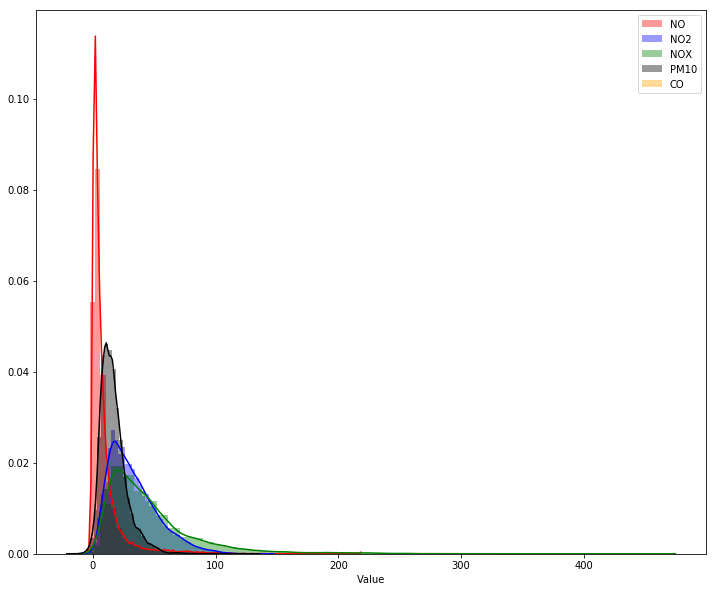

In [152]:
#Distribute plot of each gas. The gas NO looks to be more dominant 

plt.figure(figsize=(12,10))
#plt.subplot(1,2,2)
sns.distplot(putney_data_final[putney_data_final['Species'] == 'NO']['Value'][0:] , label = "NO" , color = 'red')
sns.distplot(putney_data_final[putney_data_final['Species'] == 'NO2']['Value'][0:] , label = "NO2" , color = 'blue')
sns.distplot(putney_data_final[putney_data_final['Species'] == 'NOX']['Value'] [0:], label = "NOX" , color = 'green')
sns.distplot(putney_data_final[putney_data_final['Species'] == 'PM10']['Value'][0:] , label = "PM10" , color = 'black')
sns.distplot(putney_data_final[putney_data_final['Species'] == 'CO']['Value'][0:] , label = "CO" , color = 'orange')
plt.legend()

plt.show()

If you observe the above graph the values are distributed till 120 quite more and highest with 400

# Finally, after looking at the above analysis it is very clear that Putney location is suitable for John Doherty based on Air quality index values